In [30]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import re

In [31]:
with open("comments.txt", "r") as f :
    all_comments=f.read().splitlines()

In [32]:
print(all_comments[0:10])

['Even the battery on S10e can hold longer than XS Max.... Whaddup?', 'does it have dex', 'Processor ?', 'Id get the s10 or s10+ if they were available on boost mobile', 'In my country the s10e is 500dolar😂', '750 bucks I think that anybody and I mean anybody that would give more than $300 for a phone  is nothing more than a damned idiot and nothing more than cash cows for the phone companies', '1:14 "Flagships are like $900,000" I think you were ment to say $900', 'The "e" stands for essentials @MKBHD', 'is that a toothless the dragon from how to train your dragon hoodie', 'I\'ve figured out why I don\'t like MKBHD. He has this low key god-maker arrogance. He has been so spoiled with the access he has to products that he shrugs off a $750 technological marvel and says, "eh, why not?"']


[(0, 444), (22, 142), (25, 141), (18, 134), (15, 132), (16, 129), (26, 127), (23, 126), (19, 123), (29, 123)]


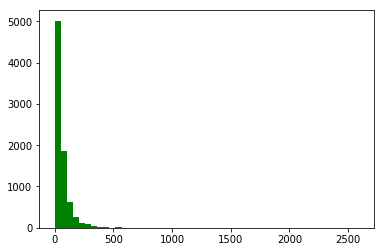

In [33]:
lengths_comments = [len(comment) for comment in all_comments]

distribution1 = nltk.FreqDist(lengths_comments)
print(distribution1.most_common(10))

plt.hist(lengths_comments, 50, facecolor='green')
plt.show()

## Let's analyze the content of the comments in function of their lengths :

In [34]:
nb_comments = 0 
for comment in all_comments :
    length_comment = len(comment)
    if length_comment < 10 :
        nb_comments += 1
        if nb_comments < 10 :
            print(comment, "\n")

wallpaper 

Have* 

 

 

 

 

Nice 

one word 

 



In [35]:
for comment in all_comments :
    length_comment = len(comment)
    if length_comment > 1000 :
        nb_comments += 1
        print(comment, "\n")

Romans 3:23 states: "For all have sinned, and come short of the glory of God;". We are all sinners, that have committed at least one sin in our lives, which earns us an eternal punishment in Hell. Revelation states 21:8 "But the fearful, and unbelieving, and the abominable, and murderers, and whoremongers, and sorcerers, and idolaters, and all liars, shall have their part in the lake which burneth with fire and brimstone: which is the second death.". God sent his Son, Jesus, to Earth as a perfect sinless sacrifice. To take on all the sins of the world; both past, present, and future sins. Shedding his blood on the cross as a blood atonement for all sins. After dying on the cross, he rose from the dead on the 3rd day and rose to Heaven. To show life after death. To show everlasting life through Jesus's sacrifice. John 14:6 states: "Jesus saith unto him, I am the way, the truth, and the life: no man cometh unto the Father, but by me.". Romans 10:13 states "For whosoever shall call upon t

In [36]:
print("At least", nb_comments, "shitty comments out of", len(all_comments), "total.")

At least 828 shitty comments out of 8105 total.


## Let's already make a first clean on the comments :

In [37]:
for comment in all_comments :
    length_comment = len(comment)
    if length_comment < 10 or length_comment > 1000:
        all_comments.remove(comment)

In [38]:
print(len(all_comments))

7473


[(22, 142), (25, 141), (0, 136), (18, 134), (15, 132), (16, 129), (26, 127), (23, 126), (19, 123), (29, 123)]


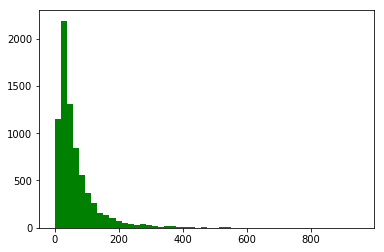

In [39]:
lengths_comments = [len(comment) for comment in all_comments]

distribution1 = nltk.FreqDist(lengths_comments)
print(distribution1.most_common(10))

plt.hist(lengths_comments, 50, facecolor='green')
plt.show()

Have to know:
The numbers of sentences by comment.
The numbers of words by sentence.
the numbers of words by comment.

## Let's make a list of lemmatized sentences :

In [40]:
# from nltk.stem import PorterStemmer
# porter=PorterStemmer()

# stemmed_sentences = []

# for comment in all_comments :
#     sentences = nltk.sent_tokenize(comment)
#     for sentence in sentences :
#         filtered_words = []
#         words = nltk.word_tokenize(sentence)
#         for word in words :
#             if re.search('[a-zA-Z$1-9]', word):
#                 filtered_words.append(word)
#         stemmed_words = [porter.stem(word) for word in filtered_words]
#         stemmed_sent = " ".join(stemmed_words)
#         if len(stemmed_sent) > 10 and len(stemmed_sent) < 100:
#             stemmed_sentences.append(stemmed_sent)

In [41]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_sentences = []

for comment in all_comments :
    sentences = nltk.sent_tokenize(comment)
    for sentence in sentences :
        filtered_words = []
        words = nltk.word_tokenize(sentence)
        for word in words :
            if re.search('[a-zA-Z$1-9]', word):
                filtered_words.append(word)
        lem_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        lem_sent = " ".join(lem_words)
        if len(lem_sent) > 10 and len(lem_sent) < 100:
            lem_sentences.append(lem_sent)

In [42]:
print(lem_sentences[:20])

['Even the battery on S10e can hold longer than XS Max Whaddup', 'doe it have dex', 'Id get the s10 or s10+ if they were available on boost mobile', 'In my country the s10e is 500dolar😂', '1:14 Flagships are like $ 900,000 I think you were ment to say $ 900', 'The e stand for essential MKBHD', 'is that a toothless the dragon from how to train your dragon hoodie', "I 've figured out why I do n't like MKBHD", 'He ha this low key god-maker arrogance', "love this phone it 's so cute", 'I hope I can get it', 'e stand for economy', 'who here is in love with baymax', 'Dope wallpaper', 'I bought this last week very happy with it', 'Is this guy from New Jersey', 'That big hero 6 wallpaper fit so well for the hole punch camera', 'E could be for elite', 'Holy shit I am getting it for the wallpaper', 'That is the smartest wallpaper lmao']


[(4, 926), (5, 899), (6, 781), (3, 754), (7, 695), (8, 595), (9, 546), (2, 519), (10, 516), (11, 445)]


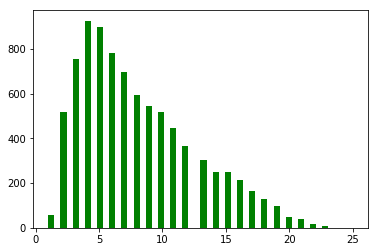

In [43]:
nb_words_sentences = []
for sentence in lem_sentences :
    words = nltk.word_tokenize(sentence)
    nb_words_sentences.append(len(words))
    
distribution1 = nltk.FreqDist(nb_words_sentences)
print(distribution1.most_common(10))

plt.hist(nb_words_sentences, 50, facecolor='green')
plt.show()

In [44]:
print(len(lem_sentences))

8629


In [45]:
#lem_sentences = [sent for sent in lem_sentences if len(nltk.word_tokenize(sentence)) > 5]

In [46]:
#print(len(lem_sentences))

In [47]:
short_sent_list = []

for sentence in lem_sentences :
    words = nltk.word_tokenize(sentence)
    if len(words) > 10 and len(words) < 15:
        short_sent_list.append(sentence)
        #print(sentence)

In [48]:
print(len(short_sent_list))

1368


In [49]:
print(len(lem_sentences))

8629


clean up the sentences form the analysis of that. List of list or just a list?

In [50]:
# all_sentences = []
# for comment in comments_sentences :
#     for sentence in comment :
#         if len(sentence) > 20 and len(sentence) < 50:
#             all_sentences.append(sentence)
# print(len(all_sentences))

In [51]:
# def filter_tokenize(comments) :
#     #could add stemming
#     comments_tokenized = []
#     for comment in comments :
#         tokenized = word_tokenize(comment)
#         #filtered = [w.lower() for w in tokenized if not w.lower() in stop_words and w.isalpha()]
#         #comments_tokenized.append(filtered)
#     return (comments_tokenized)

In [52]:
print(len(lem_sentences))

8629


In [53]:
#stop_words = set(stopwords.words("english"))

In [54]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000,
                                 min_df=0.005, stop_words="english",
                                 use_idf=True) #tokenizer=filter_tokenize, ngram_range=(1,3)

#tfidf_matrix = tfidf_vectorizer.fit_transform(all_comments)
#tfidf_matrix = tfidf_vectorizer.fit_transform(stemmed_sentences[0:1000])
#tfidf_matrix = tfidf_vectorizer.fit_transform(lem_sentences) #lem_sentences[0:1000]

tfidf_matrix = tfidf_vectorizer.fit_transform(short_sent_list[:500])

In [55]:
print(tfidf_matrix.shape)

(500, 243)


In [56]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['10', '1000', '1080', '1080p', '1440p', '20', '300', '58', '700', '720', '750', '900', 'actually', 'ago', 'agree', 'amazing', 'android', 'apple', 'appreciate', 'awesome', 'bad', 'battery', 'baymax', 'beautiful', 'believe', 'best', 'better', 'bezel', 'big', 'bigger', 'bit', 'black', 'bought', 'brownlee', 'budget', 'button', 'buy', 'buying', 'ca', 'camera', 'care', 'case', 'cheap', 'cheaper', 'chin', 'choice', 'class', 'color', 'come', 'comment', 'company', 'compared', 'cost', 'crappy', 'currently', 'curved', 'damn', 'day', 'deal', 'design', 'device', 'did', 'display', 'doe', 'does', 'dollar', 'dont', 'economy', 'edge', 'end', 'essential', 'europe', 'expensive', 'extra', 'exynos', 'far', 'feature', 'feel', 'finger', 'fingerprint', 'fit', 'flagship', 'fucking', 'galaxy', 'gesture', 'getting', 'glass', 'going', 'gon', 'good', 'got', 'great', 'guy', 'ha', 'half', 'hand', 'handed', 'hate', 'having', 'help', 'hey', 'hide', 'high', 'hole', 'honestly', 'honor', 'huge', 'id', 'idiot', 'im', 'in

In [80]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [81]:
from sklearn.cluster import KMeans

num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
#print(clusters)

In [82]:
import random
 
def colors(n):
  ret = []
  r = int(random.random() * 256)
  g = int(random.random() * 256)
  b = int(random.random() * 256)
  step = 256 / n
  for i in range(n):
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    ret.append((r/255,g/255,b/255)) 
  return ret

In [83]:
colors_list = colors(num_clusters)
#print(colors_list)

In [84]:
cluster_colors = {}
i = 0
for color in colors_list :
    cluster_colors[i] = color
    i +=1
#print(cluster_colors)

In [85]:
colors_list = colors(num_clusters)
#print(colors_list)

In [86]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS



MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

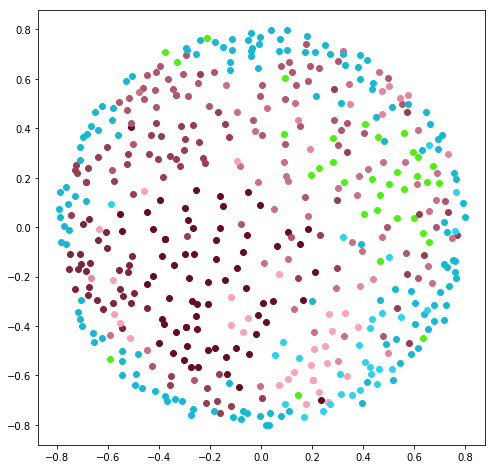

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))
groups = df.groupby('label')
print(groups)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, color=cluster_colors[name])#, mec='none'

In [160]:
from sklearn.cluster import KMeans


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
#print(order_centroids)

for c in range(num_clusters):
    for i in order_centroids[c, :6] :
        print(terms[i], end = " ")
    print()

s10e help exynos ca buy ha 
phone best good buy s10e just 
video make phone amazing s10 quality 
s10 camera screen plus curved wallpaper 
iphone just xr think ha chin 
samsung battery s10e life just did 
review hey marques love samsung like 
like love button camera phone really 
flagship price range finger wa use 
fingerprint reader sensor handed left notification 


In [153]:
grouped_clusters = []
for i in range(num_clusters):
    grouped = [cluster for cluster in clusters if cluster == i]
    grouped_clusters.append(grouped)

i = 0
for cluster in grouped_clusters :
    print("Items in cluster", i, ":", len(cluster))
    i += 1

Items in cluster 0 : 34
Items in cluster 1 : 68
Items in cluster 2 : 28
Items in cluster 3 : 57
Items in cluster 4 : 57
Items in cluster 5 : 42
Items in cluster 6 : 14
Items in cluster 7 : 31
Items in cluster 8 : 140
Items in cluster 9 : 29


In [172]:
import collections


comments_clusters = defaultdict(list)
i = 0

for cluster in clusters :
    comments_clusters[cluster].append(short_sent_list[i])
    i += 1

for cluster in range (num_clusters) :
    print("Cluster number :", cluster)
    print("Words:", end=" ")
    for i in order_centroids[cluster, :6] :
        print(terms[i], end = " ")
    print("\n")
    print(comments_clusters[cluster][:3], "\n\n") #comments_clusters

Cluster number : 0
Words: s10e help exynos ca buy ha 

['Even the battery on S10e can hold longer than XS Max Whaddup', 'Overall I think the s10e would have been the one I would buy', "I ca n't find any setting to remedy this any advice/help"] 


Cluster number : 1
Words: phone best good buy s10e just 

['I pay 700 $ for a phone that must be cheaper', 'We can all agree this phone is worth the money Sub 2 pdp', "I need a new phone so what 's a good phone on Verizon"] 


Cluster number : 2
Words: video make phone amazing s10 quality 

['Hi Marques I really enjoy all your video kudos for you', "Me rewinds video 3 time to make sure I 'm not going mad", 'Bring back the versus video between two phone that you use to make'] 


Cluster number : 3
Words: s10 camera screen plus curved wallpaper 

['Id get the s10 or s10+ if they were available on boost mobile', 'That big hero 6 wallpaper fit so well for the hole punch camera', '4.The s10 plus camera do not have original color a compared io .ipho